In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# import torch
# from torch import nn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit



In [4]:
train_data = pd.read_csv('C:\\Users\\Shaima\\Documents\\GitHub\\DeepLearning\\train.csv')
test_df = pd.read_csv('C:\\Users\\Shaima\\Documents\\GitHub\\DeepLearning\\test.csv')

In [5]:

display(train_data)


id                species   margin1   margin2   margin3   margin4  \
0       1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1       2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2       3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3       5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4       6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   
..    ...                    ...       ...       ...       ...       ...   
985  1575   Magnolia_Salicifolia  0.060547  0.119140  0.007812  0.003906   
986  1578            Acer_Pictum  0.001953  0.003906  0.021484  0.107420   
987  1581     Alnus_Maximowiczii  0.001953  0.003906  0.000000  0.021484   
988  1582          Quercus_Rubra  0.000000  0.000000  0.046875  0.056641   
989  1584         Quercus_Afares  0.023438  0.019531  0.031250  0.015625   

      margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0    0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1    0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2    0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3    0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4    0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   
..        ...       ...       ...      ...  ...        ...        ...   
985  0.000000  0.148440  0.017578      0.0  ...   0.242190   0.000000   
986  0.001953  0.000000  0.000000      0.0  ...   0.170900   0.000000   
987  0.078125  0.003906  0.007812      0.0  ...   0.004883   0.000977   
988  0.009766  0.000000  0.000000      0.0  ...   0.083008   0.030273   
989  0.005859  0.019531  0.035156      0.0  ...   0.000000   0.000000   

     texture57  texture58  texture59  texture60  texture61  texture62  \
0     0.002930   0.002930   0.035156   0.000000   0.000000   0.004883   
1     0.000000   0.000977   0.023438   0.000000   0.000000   0.000977   
2     0.005859   0.000977   0.007812   0.000000   0.000000   0.000000   
3     0.000000   0.000000   0.020508   0.000000   0.000000   0.017578   
4     0.021484   0.000000   0.000000   0.000000   0.000000   0.000000   
..         ...        ...        ...        ...        ...        ...   
985   0.034180   0.000000   0.010742   0.000000   0.000000   0.000000   
986   0.018555   0.000000   0.011719   0.000000   0.000000   0.000977   
987   0.004883   0.027344   0.016602   0.007812   0.000000   0.027344   
988   0.000977   0.002930   0.014648   0.000000   0.041992   0.000000   
989   0.002930   0.000000   0.012695   0.000000   0.000000   0.023438   

     texture63  texture64  
0     0.000000   0.025391  
1     0.039062   0.022461  
2     0.020508   0.002930  
3     0.000000   0.047852  
4     0.000000   0.031250  
..         ...        ...  
985   0.000000   0.018555  
986   0.000000   0.021484  
987   0.000000   0.001953  
988   0.001953   0.002930  
989   0.025391   0.022461  

[990 rows x 193 columns]

In [6]:
display(test_df)

id   margin1   margin2   margin3   margin4   margin5   margin6  \
0       4  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625   
1       7  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672   
2       9  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000   
3      12  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000   
4      13  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000   
..    ...       ...       ...       ...       ...       ...       ...   
589  1576  0.000000  0.000000  0.003906  0.015625  0.041016  0.000000   
590  1577  0.000000  0.003906  0.003906  0.005859  0.017578  0.000000   
591  1579  0.017578  0.029297  0.015625  0.013672  0.003906  0.015625   
592  1580  0.013672  0.009766  0.060547  0.025391  0.035156  0.025391   
593  1583  0.000000  0.117190  0.000000  0.019531  0.000000  0.136720   

      margin7   margin8   margin9  ...  texture55  texture56  texture57  \
0    0.005859  0.000000  0.005859  ...   0.006836   0.000000   0.015625   
1    0.007812  0.000000  0.033203  ...   0.000000   0.000000   0.006836   
2    0.023438  0.000000  0.011719  ...   0.128910   0.000000   0.000977   
3    0.003906  0.000000  0.003906  ...   0.012695   0.015625   0.002930   
4    0.009766  0.000000  0.005859  ...   0.000000   0.042969   0.016602   
..        ...       ...       ...  ...        ...        ...        ...   
589  0.017578  0.000000  0.005859  ...   0.098633   0.000000   0.004883   
590  0.017578  0.005859  0.000000  ...   0.012695   0.004883   0.004883   
591  0.025391  0.000000  0.000000  ...   0.073242   0.000000   0.028320   
592  0.039062  0.000000  0.003906  ...   0.003906   0.000000   0.000977   
593  0.001953  0.005859  0.000000  ...   0.107420   0.012695   0.016602   

     texture58  texture59  texture60  texture61  texture62  texture63  \
0     0.000977   0.015625        0.0        0.0   0.000000   0.003906   
1     0.001953   0.013672        0.0        0.0   0.000977   0.037109   
2     0.000000   0.000000        0.0        0.0   0.015625   0.000000   
3     0.036133   0.013672        0.0        0.0   0.089844   0.000000   
4     0.010742   0.041016        0.0        0.0   0.007812   0.009766   
..         ...        ...        ...        ...        ...        ...   
589   0.000000   0.003906        0.0        0.0   0.018555   0.000000   
590   0.002930   0.009766        0.0        0.0   0.090820   0.000000   
591   0.000000   0.001953        0.0        0.0   0.000000   0.042969   
592   0.000000   0.011719        0.0        0.0   0.000000   0.011719   
593   0.000977   0.004883        0.0        0.0   0.015625   0.000000   

     texture64  
0     0.053711  
1     0.044922  
2     0.000000  
3     0.008789  
4     0.007812  
..         ...  
589   0.000977  
590   0.016602  
591   0.006836  
592   0.018555  
593   0.017578  

[594 rows x 193 columns]

In [31]:
train_data.describe()

id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.001953    0.000000    0.005859    0.000000    0.001953  ...   
50%      0.007812    0.015625    0.015625    0.000000    0.005859  ...   
75%      0.017578    0.056153    0.029297    0.000000    0.007812  ...   
max      0.111330    0.310550    0.091797    0.031250    0.076172  ...   

        texture55   texture56   texture57   texture58   texture59   texture60  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.036501    0.005024    0.015944    0.011586    0.016108    0.014017   
std      0.063403    0.019321    0.023214    0.025040    0.015335    0.060151   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000977    0.000000    0.004883    0.000000   
50%      0.004883    0.000000    0.005859    0.000977    0.012695    0.000000   
75%      0.043701    0.000000    0.022217    0.009766    0.021484    0.000000   
max      0.429690    0.202150    0.172850    0.200200    0.106450    0.578130   

        texture61   texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  990.000000  
mean     0.002688    0.020291    0.008989    0.019420  
std      0.011415    0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000977  
50%      0.000000    0.003906    0.002930    0.011719  
75%      0.000000    0.023438    0.012695    0.029297  
max      0.151370    0.375980    0.086914    0.141600  

[8 rows x 193 columns]

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [28]:
train_data.head()

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 194 columns]

In [33]:
train_data.dropna(inplace=True) #The dropna () method removes the rows that contains NULL values

In [38]:
plt.figure(figsize=(200,50))
sns.countplot(x='species',data=train_data) #outliers 
plt.show()

In [8]:
label_encoder = LabelEncoder().fit(train_data.species)
labels = label_encoder.transform(train_data.species)
classes = list(label_encoder.classes_)
print(labels)

[ 3 49 65 94 84 40 54 78 53 89 98 16 74 50 58 31 43  4 75 44 83 84 13 66
 15  6 73 22 73 31 36 27 94 88 12 28 21 25 20 60 84 65 69 58 23 76 18 52
 54  9 48 47 64 81 83 36 58 21 81 20 62 88 34 92 79 82 20 32  4 84 36 35
 72 60 71 72 52 50 54 11 51 18 47  5  8 37 97 20 33  1 59  1 56  1  9 57
 20 79 29 16 32 54 93 10 46 59 84 76 15 10 15  0 69  4 51 51 94 36 39 62
  2 24 26 35 25 87  0 55 34 38  1 45  7 93 56 38 21 51 75 81 74 33 20 37
  9 40 60 31 83 50 71 67 30 66  1 43 61 23 65 84 87 46 57 16  2 28 12 96
 44 76 29 75 41 87 67 61 30  5 12 62  3 83 81  6 85  4 37 57 84 39 71 61
  6 76 14 31 98 40 17 51 16 42 63 86 37 69 86 71 80 78 14 35 25  5 39  8
  9 26 44 60 13 14 77 13 80 87 18 60 78 92 51 45 78 41 51 30 14 35 46 21
  8  6 92 38 40 15 32 17 93 71 92 27 78 15 19 60 21 38 36 49 74 67 95 31
 82 45 16 83 63 80 42 22 74 53 15 44 47 57 94 76 17 32 24 15 93 24 80 59
 46 12 51 77 79 70 69 16  2 63 83 55 12 53  1 67  0  2 36 42 10  9 52 59
  6 22 86 31 51 37 43 75 90 24 86 96 45 32 98 36 66

In [49]:
# train_data.rename(columns = {'species':'labels'})
# print(labels)

In [52]:
print("Duplicated data:", train_data.duplicated().sum())

Duplicated data: 0


In [39]:
#train_data = train_data.drop(['species'],axis=1)
df = pd.DataFrame(data=train_data, columns=['margin1','margin2','margin3','margin4','margin5','margin6','margin7','margin8','margin9','margin10','margin11','margin12','margin13','margin14','margin15','margin16','margin17','margin18','margin19','margin20','margin21','margin22','margin23','margin24','margin25','margin26'])
print(df)


      margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0    0.007812  0.023438  0.023438  0.003906  0.011719  0.009766  0.027344   
1    0.005859  0.000000  0.031250  0.015625  0.025391  0.001953  0.019531   
2    0.005859  0.009766  0.019531  0.007812  0.003906  0.005859  0.068359   
3    0.000000  0.003906  0.023438  0.005859  0.021484  0.019531  0.023438   
4    0.005859  0.003906  0.048828  0.009766  0.013672  0.015625  0.005859   
..        ...       ...       ...       ...       ...       ...       ...   
985  0.060547  0.119140  0.007812  0.003906  0.000000  0.148440  0.017578   
986  0.001953  0.003906  0.021484  0.107420  0.001953  0.000000  0.000000   
987  0.001953  0.003906  0.000000  0.021484  0.078125  0.003906  0.007812   
988  0.000000  0.000000  0.046875  0.056641  0.009766  0.000000  0.000000   
989  0.023438  0.019531  0.031250  0.015625  0.005859  0.019531  0.035156   

     margin8   margin9  margin10  ...  margin17  margin18  margin19  margin

margin 2

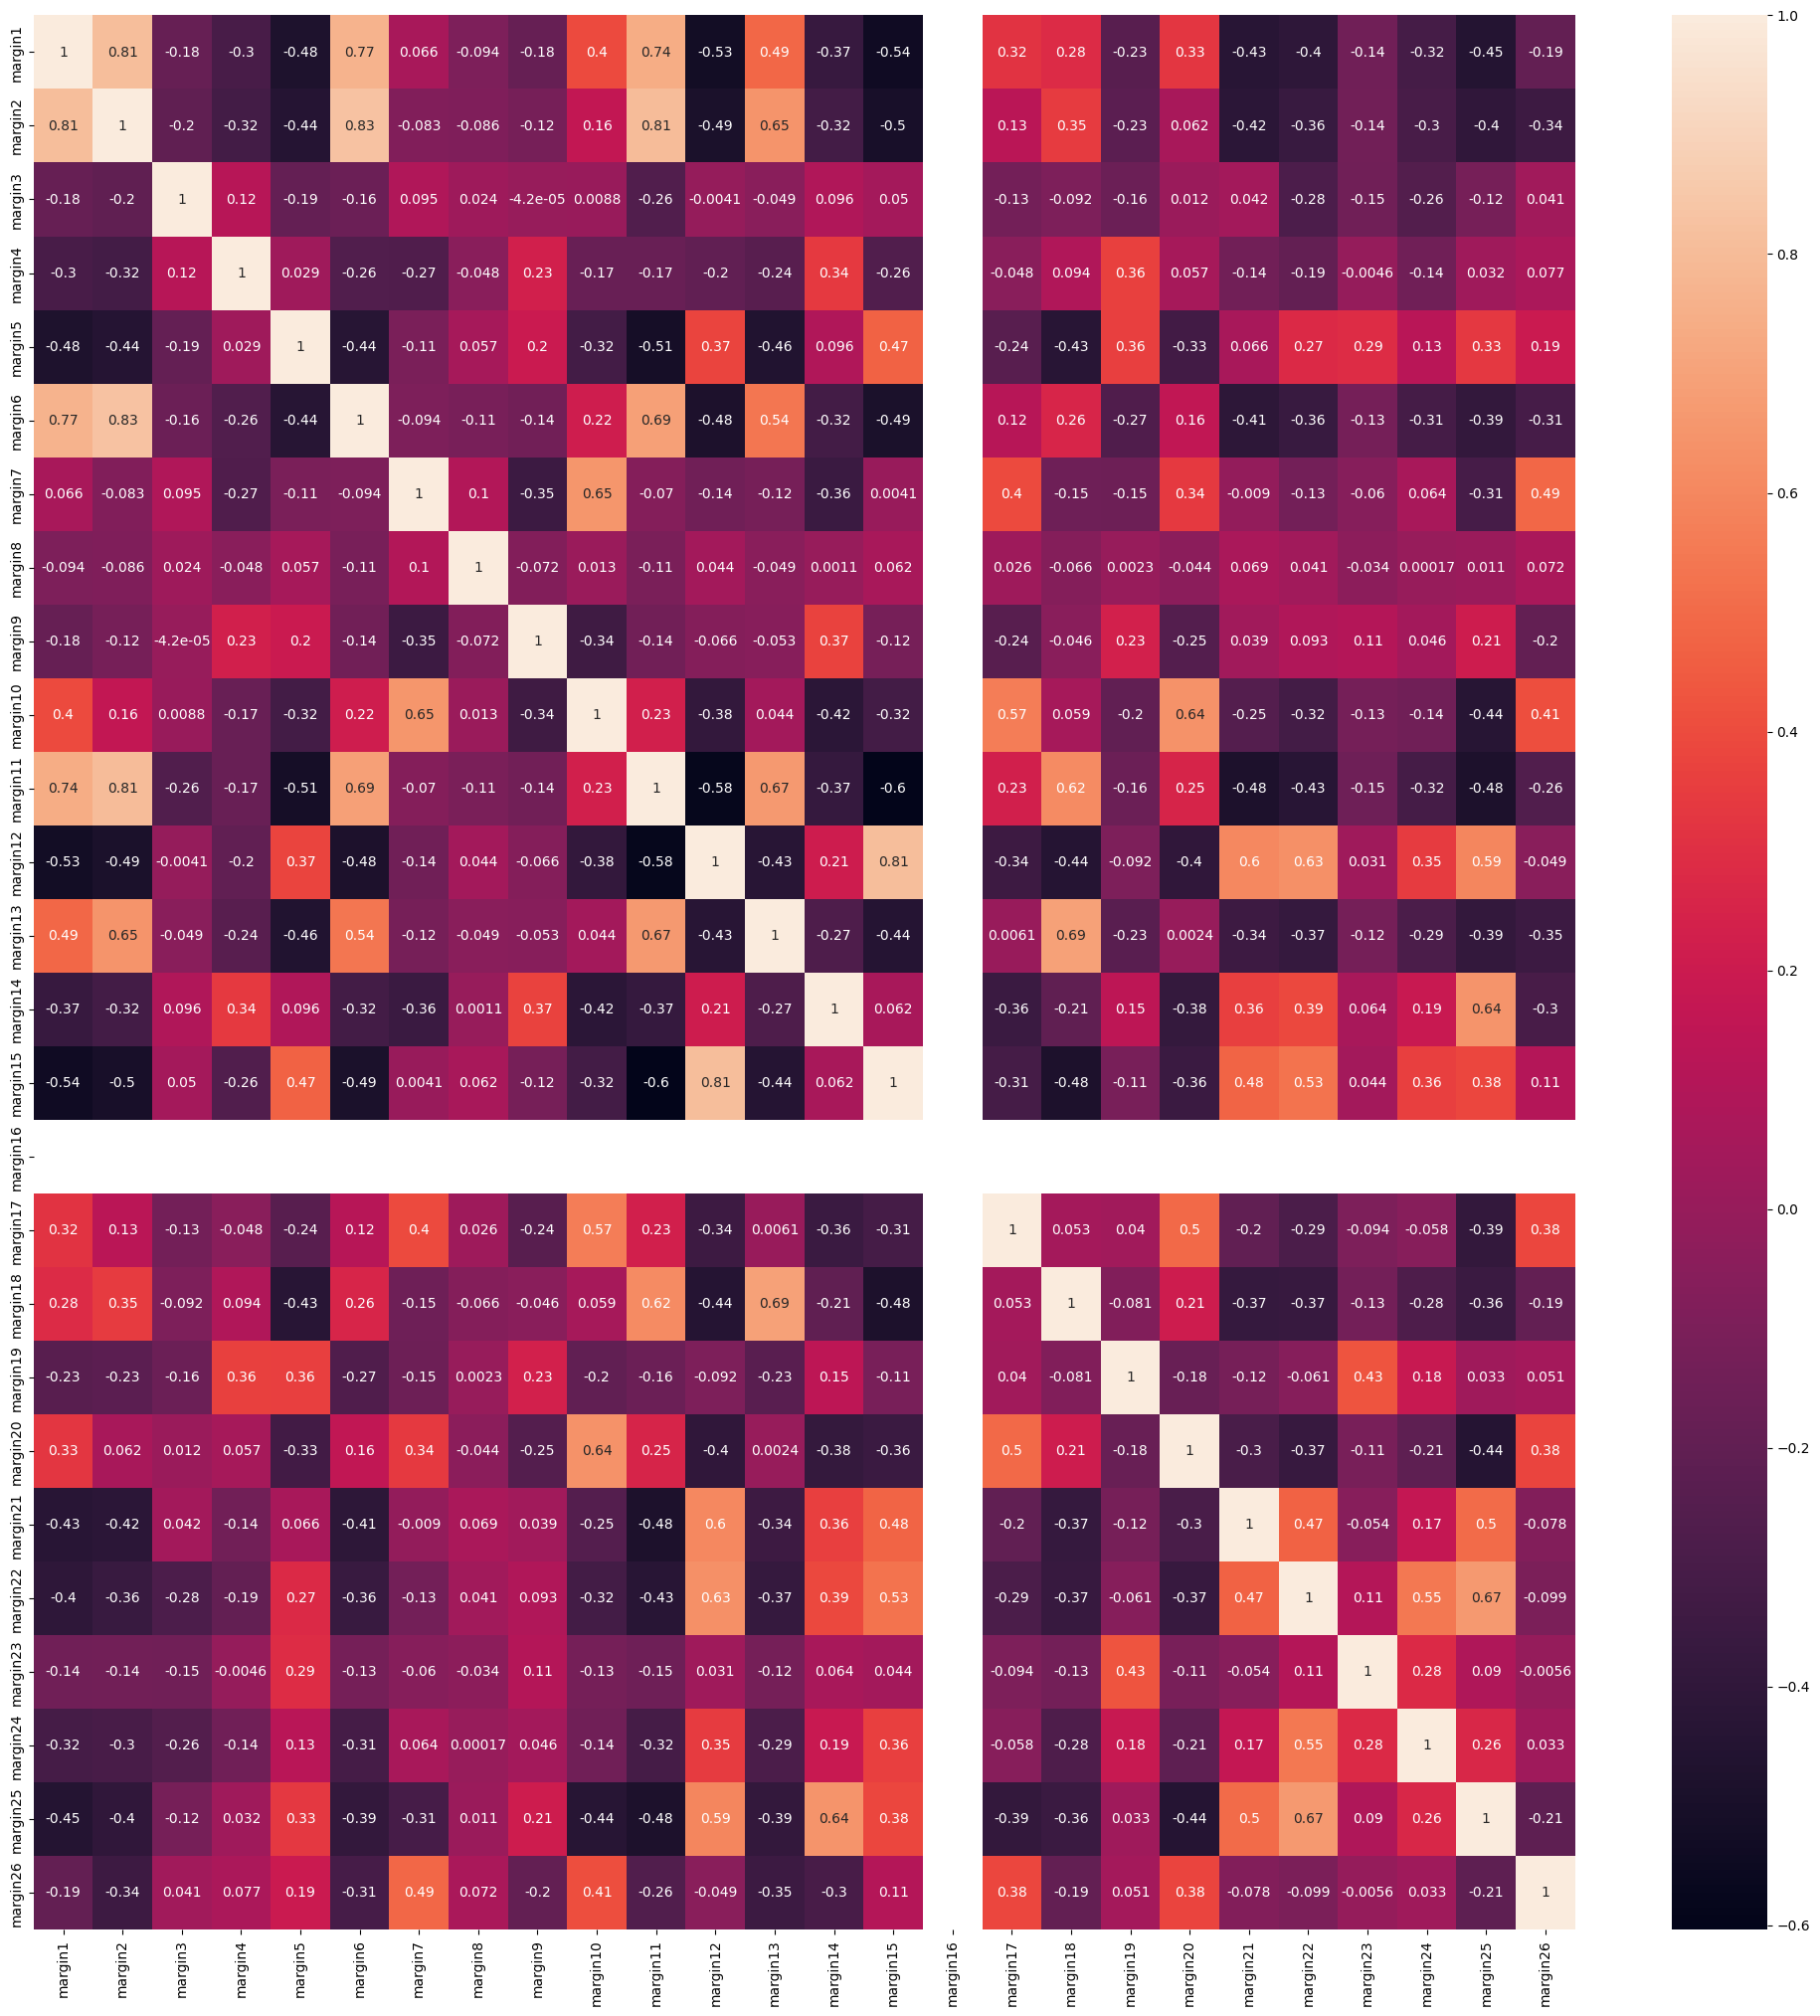

In [43]:
matrix = df.corr()[['margin1','margin2','margin3','margin4','margin5','margin6','margin7','margin8','margin9','margin10','margin11','margin12','margin13','margin14','margin15','margin16','margin17','margin18','margin19','margin20','margin21','margin22','margin23','margin24','margin25','margin26']]
fig,ax=plt.subplots(figsize=(25,25))
sns.heatmap(matrix, annot=True,ax=ax)
plt.show()

In [73]:
X = train_data.iloc[:, 0:194].values
y = train_data.iloc[:,1].values

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#train_data = train_data.drop(['species'],axis=1)
X_train = sc.fit_transform(X_train)
print(X_train)
X_test = sc.transform(X_test)

[[ 0.3892235  -0.69550185 -0.54024011 ... -0.5083175  -0.65382553
  -0.5347757 ]
 [-1.60078266  1.61006829  0.84178573 ...  0.415915   -0.65382553
  -0.84406253]
 [ 0.54860108  0.80813308  1.91661319 ... -0.5083175  -0.65382553
  -0.66734012]
 ...
 [ 0.47112587  1.61006829  2.01908253 ... -0.12914582 -0.65382553
   1.98367696]
 [ 0.24312739 -0.89597282 -0.74496915 ...  0.93726697 -0.50651499
  -0.5347757 ]
 [ 0.68584289 -0.89597282 -0.74496915 ... -0.24764152  0.67204478
   0.39308481]]


In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=180)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.99999583e-01 6.15320595e-08 4.47489897e-08 3.60545019e-08
 2.94704530e-08 2.33618790e-08 1.84867923e-08 1.76362376e-08
 1.58279507e-08 1.37419097e-08 1.23487715e-08 1.06590071e-08
 9.42868356e-09 8.08637899e-09 7.33086523e-09 6.72579373e-09
 6.42139415e-09 6.20997705e-09 5.92564076e-09 5.30017038e-09
 4.40484115e-09 4.04457516e-09 3.86526814e-09 3.44617386e-09
 3.20170258e-09 2.98425625e-09 2.89711760e-09 2.74458574e-09
 2.51245520e-09 2.30609763e-09 2.16873365e-09 2.05772134e-09
 1.96110431e-09 1.70202081e-09 1.66493018e-09 1.54731990e-09
 1.47455692e-09 1.41755870e-09 1.33366509e-09 1.27512337e-09
 1.16990753e-09 1.10048063e-09 1.02165181e-09 9.85472325e-10
 9.12987284e-10 9.07696469e-10 8.52812927e-10 8.17995410e-10
 7.90972325e-10 7.50728168e-10 7.15471996e-10 7.02264625e-10
 6.82362915e-10 6.50205359e-10 6.12789664e-10 6.01407898e-10
 5.76819425e-10 5.74814014e-10 5.27609309e-10 5.12251740e-10
 4.91560229e-10 4.83800921e-10 4.55535972e-10 4.32928129e-10
 4.16764659e-10 4.103258

In [76]:
columns = X_train.shape[1]
print(columns)

180


In [80]:
columns = len(X_train.columns)
print(columns)

AttributeError: module 'pandas' has no attribute 'X_train'

In [63]:
print(X)

[[1.0000e+00 7.8120e-03 2.3438e-02 ... 4.8830e-03 0.0000e+00 2.5391e-02]
 [2.0000e+00 5.8590e-03 0.0000e+00 ... 9.7700e-04 3.9062e-02 2.2461e-02]
 [3.0000e+00 5.8590e-03 9.7660e-03 ... 0.0000e+00 2.0508e-02 2.9300e-03]
 ...
 [1.5810e+03 1.9530e-03 3.9060e-03 ... 2.7344e-02 0.0000e+00 1.9530e-03]
 [1.5820e+03 0.0000e+00 0.0000e+00 ... 0.0000e+00 1.9530e-03 2.9300e-03]
 [1.5840e+03 2.3438e-02 1.9531e-02 ... 2.3438e-02 2.5391e-02 2.2461e-02]]
